In [1]:
import pandas as pd
from collections import Counter
import nltk
from bpemb import BPEmb
import numpy as np
from nltk.tokenize import MWETokenizer
import unidecode
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation as LDA
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
import random

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [3]:
def parti_clean(row):
    if row['parti'] != 'NI':
        return row['parti']
    
    else:
        if row['nom'] in ['Albane Gaillot', 'Aurelien Tache', 'Cedric Villani', 'Delphine Bagarry', 'Emilie Cariou',
                            'Guillaume Chiche', 'Hubert Julien-Laferriere', 'Olivier Gaillard', 'Paula Forteza',
                            'Yolaine de Courson']:
            return 'LREM'
        
        elif row['nom'] in ['Bruno Bilde', 'Emmanuelle Menard', 'Ludovic Pajot', 'Marine Le Pen']:
            return 'RN'
        
        elif row['nom'] in ['Delphine Batho']:
            return 'EELV'
        
        elif row['nom'] in ['Gilbert Collard', 'Jacques Bompard', 'Louis Aliot', 'Matthieu Orphelin', 'Sebastien Chenu']:
            return 'null'
        
        elif row['nom'] in ['Joachim Son-Forget']:
            return 'UDI'
        
        elif row['nom'] in ['Jose Evrard', 'Marie-France Lorho', 'Nicolas Dupont-Aignan']:
            return 'DLF'
        
        elif row['nom'] in ['Sebastien Nadot']:
            return 'RPS'

In [4]:
def orientation(row):
    if row['parti'] in ['GDR', 'LFI', 'SOC', 'UDI', 'UAI', 'RPS', 'EELV', 'NG']:
        return 'gauche'
    
    if row['parti'] in ['LREM', 'MODEM']:
        return 'centre'
    
    if row['parti'] in ['LR', 'AE', 'DLF', 'RN']:
        return 'droite'

In [5]:
def opposition(row):
    if row['parti'] in ['GDR', 'LFI', 'LT', 'DLF', 'RN']:
        return 'opposition'
    else:
        return 'soutien'

In [13]:
bpemb_fr = BPEmb(lang="fr", dim=50, vs=50000)

In [6]:
df_clean = pd.read_csv('depute_texte_counter.csv', index_col='Unnamed: 0')\
            .rename(columns={'Unnamed: 0.1.1.1': 'nom',
                    'texte': 'texte',
                    'counter': 'counter'})

In [7]:
df_depute = pd.read_csv('depute_database.csv', sep=";")

In [8]:
final = df_clean.join(df_depute.set_index('nom'), on='nom')

In [9]:
final['parti'] = final.apply(lambda row : parti_clean(row), axis = 1)

In [10]:
final['opposition'] = final.apply(lambda row : opposition(row), axis = 1)

In [11]:
final['orientation'] = final.apply(lambda row : orientation(row), axis = 1)

In [20]:
final.groupby(['opposition', 'orientation']).size()

opposition  orientation
opposition  droite           7
            gauche          33
soutien     centre         357
            droite         124
            gauche          56
dtype: int64

In [14]:
#AE = Agir Ensemble : droite, soutien au gvt
#GDR = Gauche démocrate et républicaine : gauche, communistes, opposition
#LFI = France insoumise : gauche, opposition
#LR = Les républicains : droite, partagés sur la question mais plutôt soutien
#LREM : groupe du gvt, centre
#LT = Liberté et territoire : opposition à partir de juillet 2020 (pas avant donc)
#MODEM = Mouvement démocrate : soutien
#SOC = Parti socialiste et apparentés : soutien 
#UAI = UDI = Union des démocrates et indépendants : soutien
#DLF = Debout la France : opposition
#RPS = Regions et peuples solidaires : ?
#EELV = Europe Ecologie Les Verts : soutien
#RN = Rassemblement national : opposition
#NG = Nouvelle Gauche : ?

final.groupby('parti').size()

parti
AE        20
DLF        3
EELV       1
GDR       16
LFI       17
LR       104
LREM     297
LT        16
MODEM     60
NG         2
RN         4
RPS        1
SOC       29
UAI        4
UDI       19
null       5
dtype: int64

In [15]:
#df_clean['counter'] = df_clean.apply(lambda row: {k: v for k, v in sorted(Counter(nltk.word_tokenize(row['texte'])).items(), key=lambda item: item[1], reverse = True)}, axis=1)

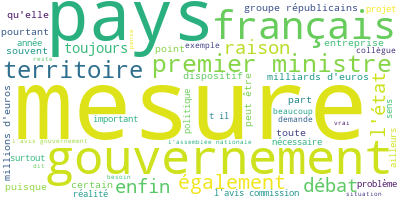

In [21]:
# Import the wordcloud library
# Join the different processed titles together.
long_string = ','.join(list(final[final.orientation == 'droite'].texte.values))# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=50, contour_width=3, contour_color='steelblue')# Generate a word cloud
wordcloud.generate(long_string)# Visualize the word cloud
wordcloud.to_image()

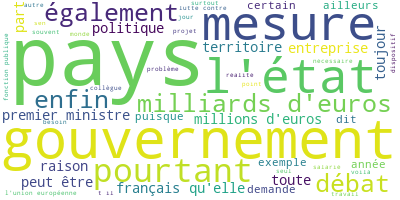

In [22]:
# Import the wordcloud library
long_string = ','.join(list(final[final.orientation == 'gauche'].texte.values))# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=50, contour_width=3, contour_color='steelblue')# Generate a word cloud
wordcloud.generate(long_string)# Visualize the word cloud
wordcloud.to_image()

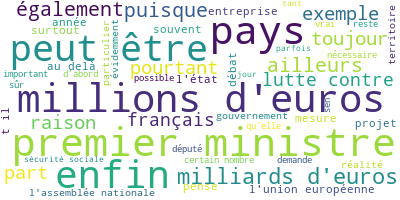

In [24]:
# Import the wordcloud library
from wordcloud import WordCloud# Join the different processed titles together.
long_string = ','.join(list(final[final.orientation != 'centre'].texte.values))# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=50, contour_width=3, contour_color='steelblue')# Generate a word cloud
wordcloud.generate(long_string)# Visualize the word cloud
wordcloud.to_image()

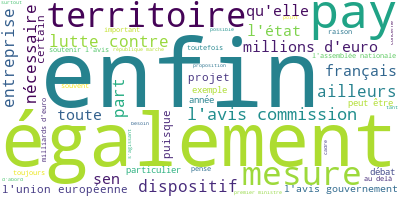

In [25]:
# Import the wordcloud library
from wordcloud import WordCloud# Join the different processed titles together.
long_string = ','.join(list(final[final.orientation == 'centre'].texte.values))# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=50, contour_width=3, contour_color='steelblue')# Generate a word cloud
wordcloud.generate(long_string)# Visualize the word cloud
wordcloud.to_image()

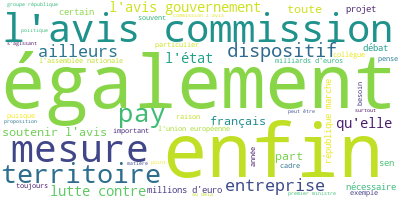

In [26]:
# Import the wordcloud library
from wordcloud import WordCloud# Join the different processed titles together.
long_string = ','.join(list(final[final.parti == 'LREM'].texte.values))# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=50, contour_width=3, contour_color='steelblue')# Generate a word cloud
wordcloud.generate(long_string)# Visualize the word cloud
wordcloud.to_image()

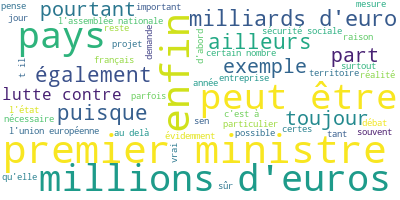

In [27]:
# Import the wordcloud library
from wordcloud import WordCloud# Join the different processed titles together.
long_string = ','.join(list(final[final.parti != 'LREM'].texte.values))# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=50, contour_width=3, contour_color='steelblue')# Generate a word cloud
wordcloud.generate(long_string)# Visualize the word cloud
wordcloud.to_image()

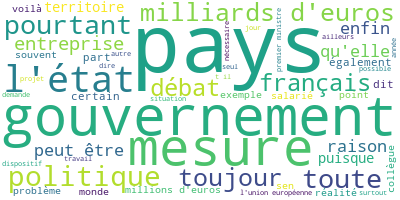

In [20]:
# Import the wordcloud library
from wordcloud import WordCloud# Join the different processed titles together.
long_string = ','.join(list(final[final.opposition == 'opposition'].texte.values))# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=50, contour_width=3, contour_color='steelblue')# Generate a word cloud
wordcloud.generate(long_string)# Visualize the word cloud
wordcloud.to_image()

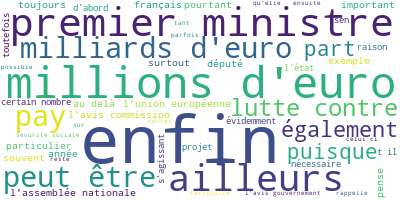

In [21]:
# Import the wordcloud library
from wordcloud import WordCloud# Join the different processed titles together.
long_string = ','.join(list(final[final.opposition == 'soutien'].texte.values))# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=50, contour_width=3, contour_color='steelblue')# Generate a word cloud
wordcloud.generate(long_string)# Visualize the word cloud
wordcloud.to_image()

In [14]:
count_vectorizer = CountVectorizer()

In [29]:
#Tous le monde

count_data = count_vectorizer.fit_transform(final['texte'])

def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
# Tweak the two parameters below
number_topics = 10
number_words = 20# Create and fit the LDA model
lda = LDA(n_components=number_topics, n_jobs=-1)
lda.fit(count_data)# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)

Topics found via LDA:

Topic #0:
qu agriculture agriculteurs produits ai agricole commission gouvernement alimentation travail ensemble groupe on territoires prix être amendements ministre en monde

Topic #1:
pays européenne accord union europe qu français états politique contre européen république commission coopération sécurité développement droit matière gouvernement défense

Topic #2:
santé travail qu sociale emploi système gouvernement ans soins femmes situation euros sécurité afin accès ai mesures ensemble formation également

Topic #3:
territoires qu gouvernement état collectivités commission ai territoire également ministre ensemble transition afin euros matière développement en cadre français on

Topic #4:
qu commission droit état gouvernement ai justice amendements contre en il groupe être travail également semble publique conseil avis débat

Topic #5:
euros entreprises finances qu gouvernement état impôt milliards commission année millions en budget ai français taux amendeme

In [16]:

count_data = count_vectorizer.fit_transform(final[final.opposition == 'opposition']['texte'])

def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
# Tweak the two parameters below
number_topics = 9
number_words = 15# Create and fit the LDA model
lda = LDA(n_components=number_topics, n_jobs=-1)
lda.fit(count_data)# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)

Topics found via LDA:

Topic #0:
recherche qu éducation travail école état nationale étudiants contre droit enseignement toutes sport euros publique

Topic #1:
outre mer qu réunion guyane territoires gouvernement sociale euros contre travail vie droit état collègues

Topic #2:
qu on pays en dire est il état droit ai contre français rien être dit

Topic #3:
qu santé groupe euros gouvernement sociale il travail ai état ans en femmes territoires on

Topic #4:
travail qu santé sociale droit salariés on gouvernement état en sécurité débat il ai politique

Topic #5:
qu contre état gouvernement droit politique justice majorité travail droits moyens publique nombre débat amendements

Topic #6:
qu groupe territoires état pays commission gouvernement politique on ministre ai français en il premier

Topic #7:
qu euros milliards état on gouvernement pays en entreprises vous impôt contre politique il ans

Topic #8:
qu français état droit contre euros on gouvernement il en territoires presse pays en

In [17]:
def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(2, 5, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f'Topic {topic_idx +1}',
                     fontdict={'fontsize': 30})
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=20)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

In [53]:
tfidf_vectorizer = CountVectorizer(max_df=0.95, min_df=2,
                                max_features=1000)

In [48]:
tfidf = tfidf_vectorizer.fit_transform(final['texte'].values)

In [49]:
nmf = NMF(n_components=10, random_state=1,
          beta_loss='kullback-leibler', solver='mu', max_iter=1000, alpha=.1,
          l1_ratio=.5).fit(tfidf)

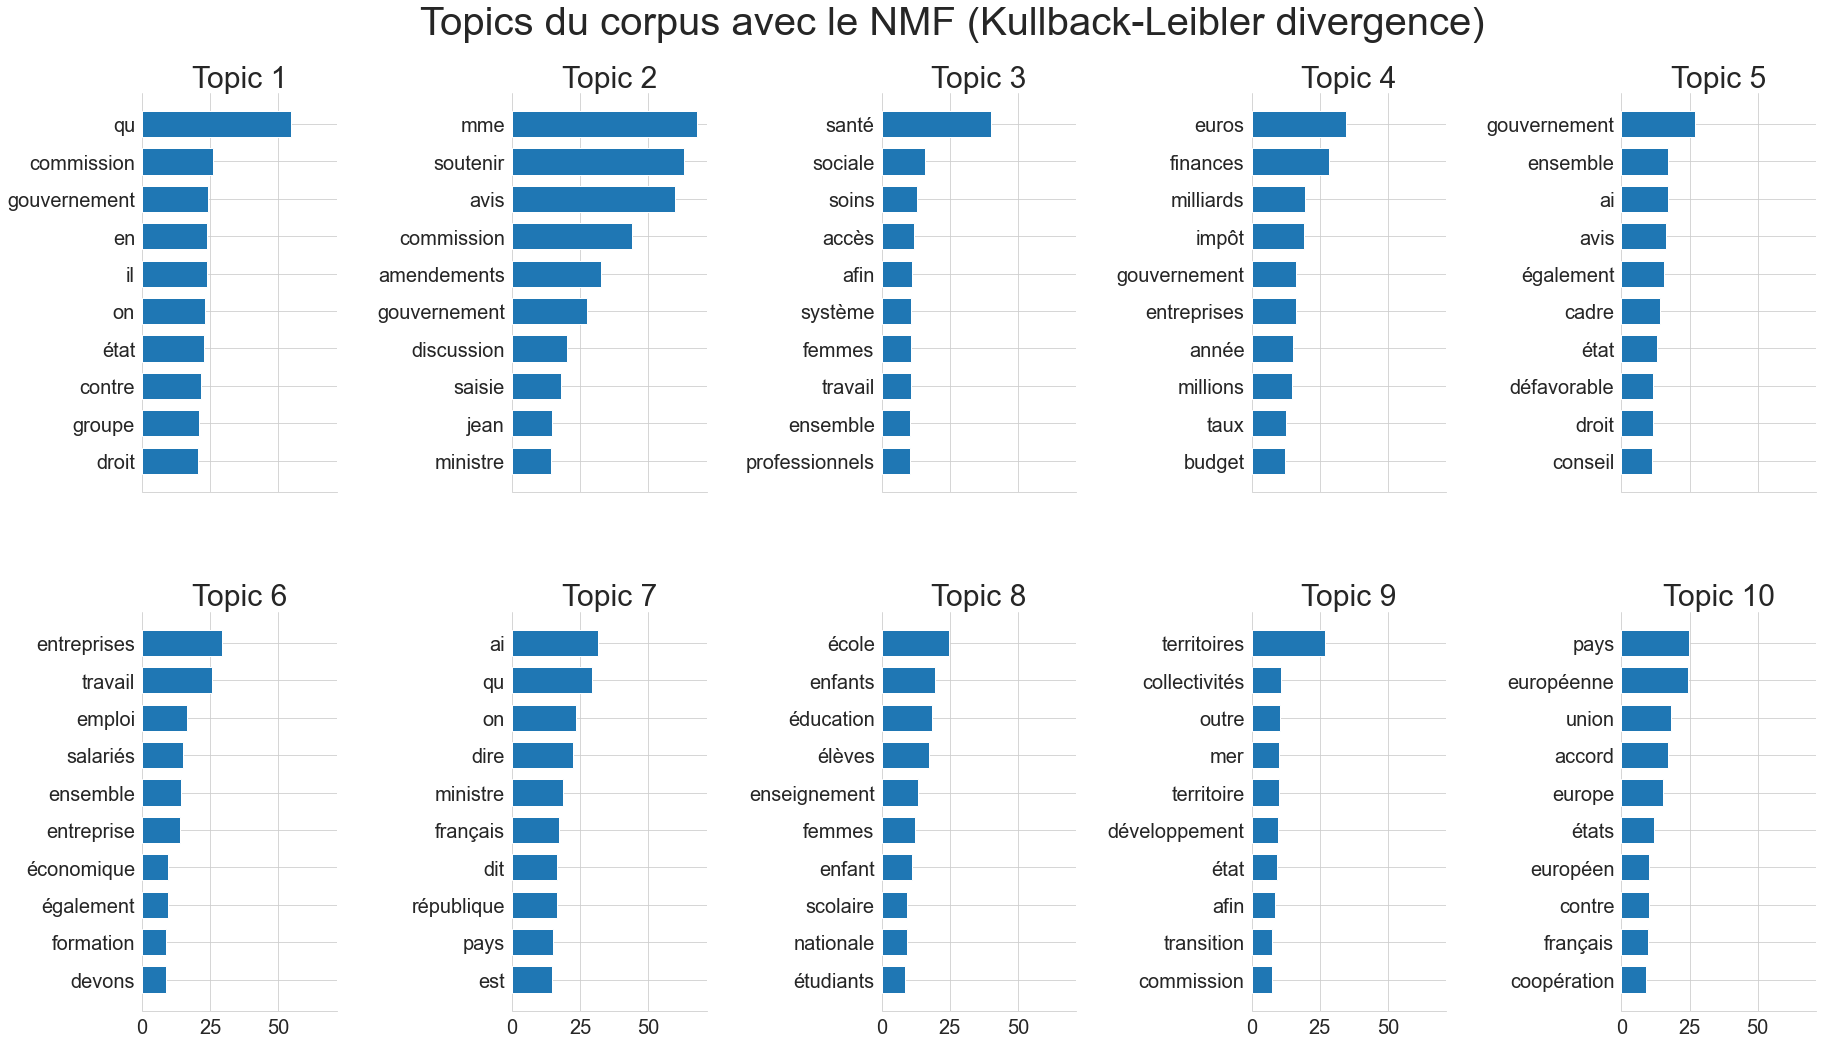

In [50]:
tfidf_feature_names = tfidf_vectorizer.get_feature_names()
plot_top_words(nmf, tfidf_feature_names, 10,
               'Topics du corpus avec le NMF (Kullback-Leibler divergence)')

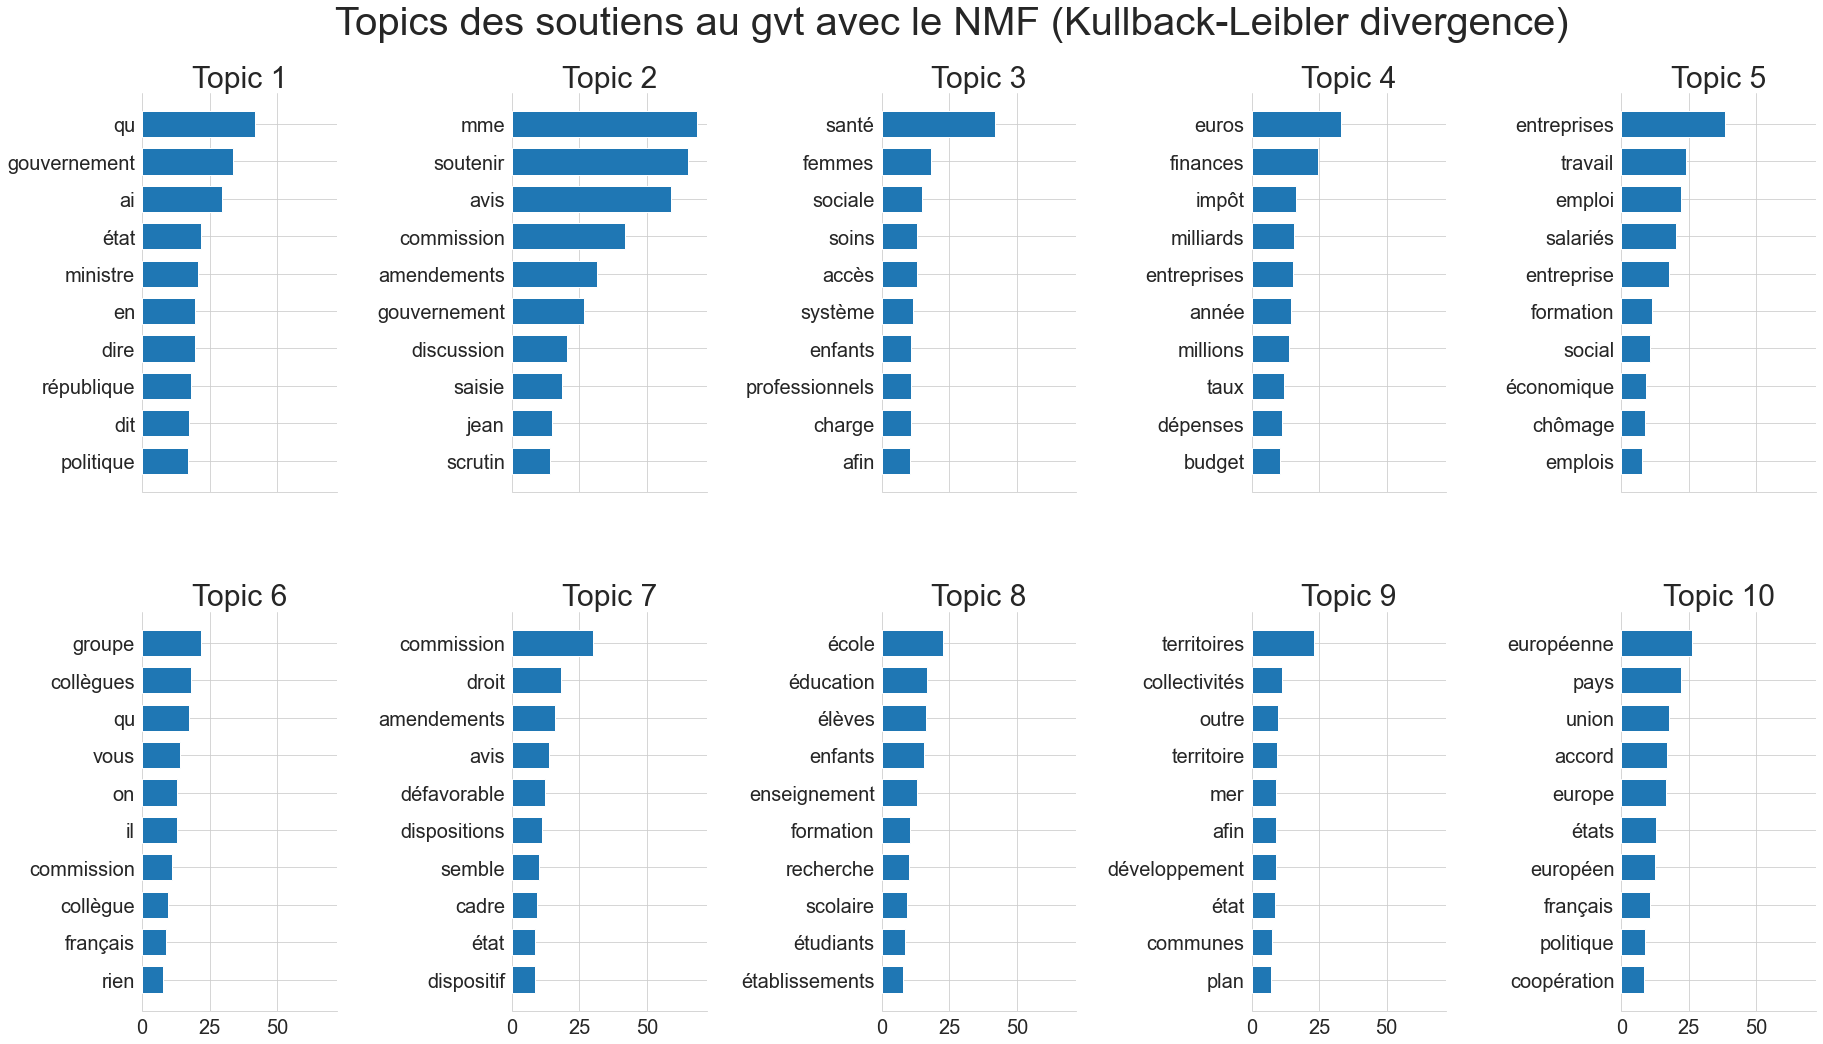

In [54]:
tfidf = tfidf_vectorizer.fit_transform(final['texte'][final.opposition == 'soutien'].values)

nmf = NMF(n_components=10, random_state=1,
          beta_loss='kullback-leibler', solver='mu', max_iter=1000, alpha=.1,
          l1_ratio=.5).fit(tfidf)

tfidf_feature_names = tfidf_vectorizer.get_feature_names()
plot_top_words(nmf, tfidf_feature_names, 10,
               'Topics des soutiens au gvt avec le NMF (Kullback-Leibler divergence)')

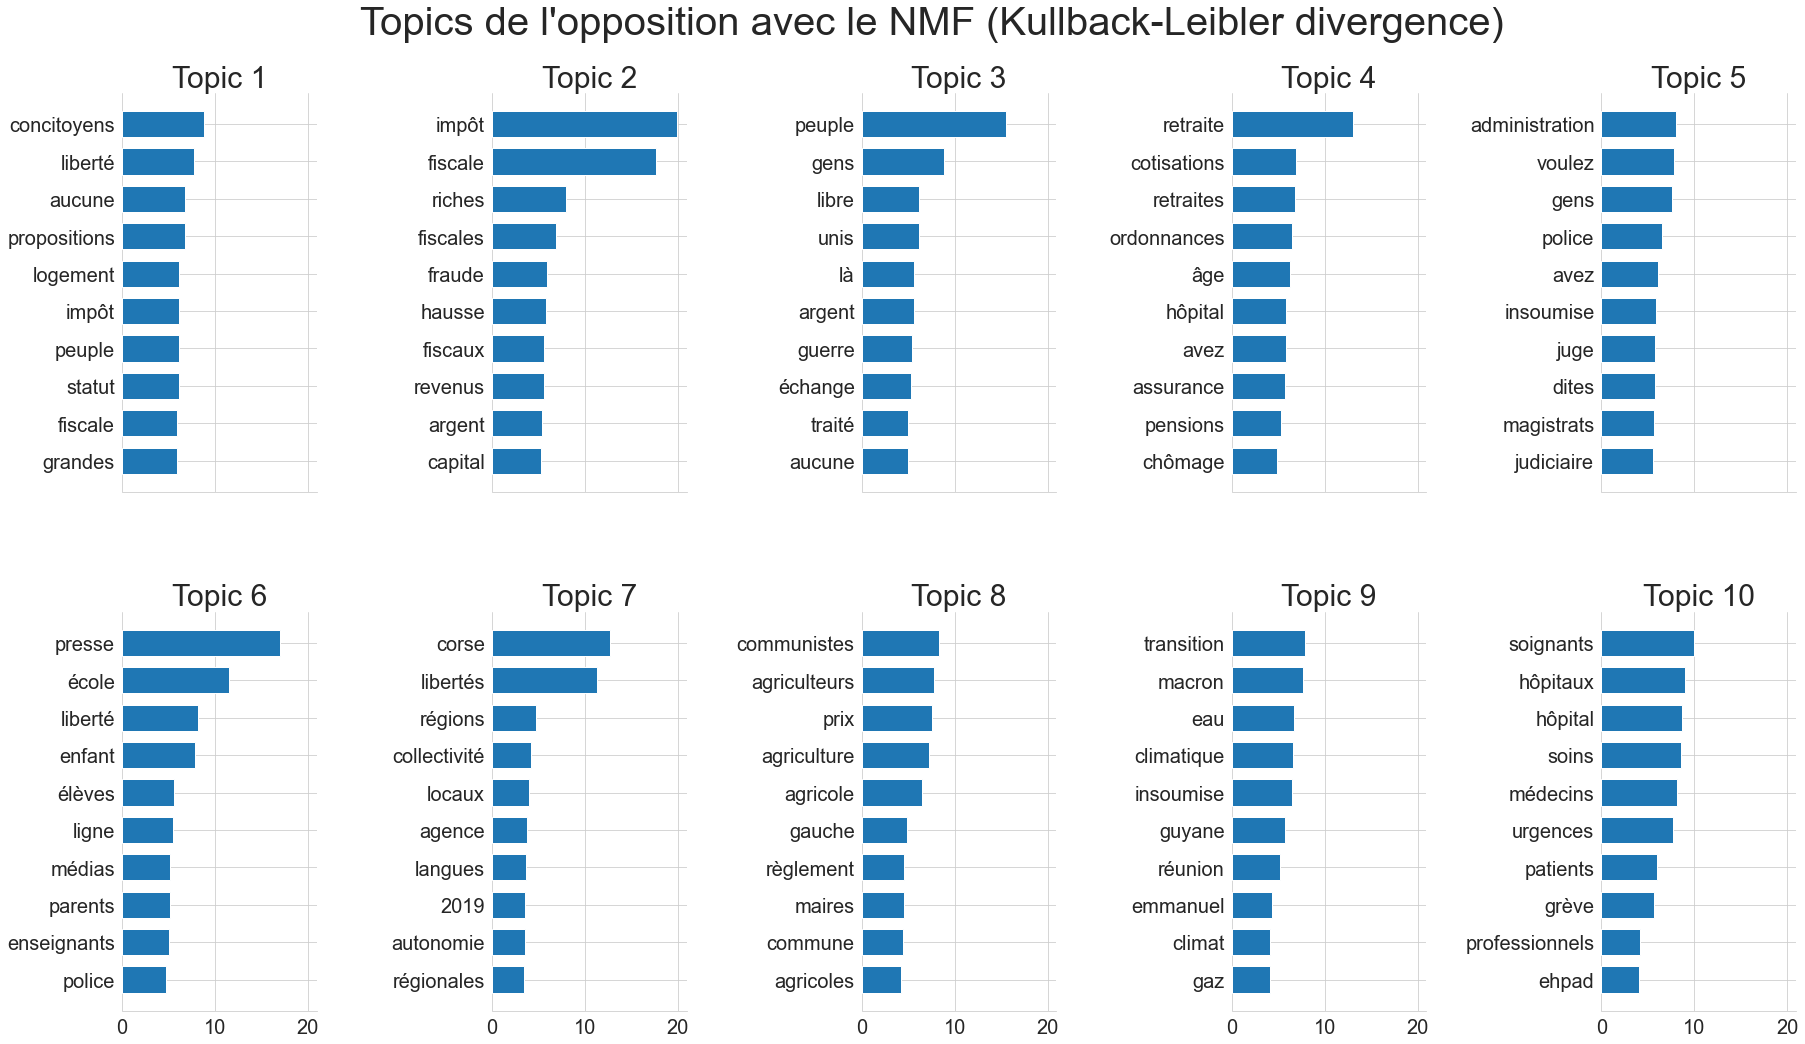

In [55]:
tfidf = tfidf_vectorizer.fit_transform(final['texte'][final.opposition == 'opposition'].values)

nmf = NMF(n_components=10, random_state=1,
          beta_loss='kullback-leibler', solver='mu', max_iter=1000, alpha=.1,
          l1_ratio=.5).fit(tfidf)

tfidf_feature_names = tfidf_vectorizer.get_feature_names()
plot_top_words(nmf, tfidf_feature_names, 10,
               "Topics de l'opposition avec le NMF (Kullback-Leibler divergence)")

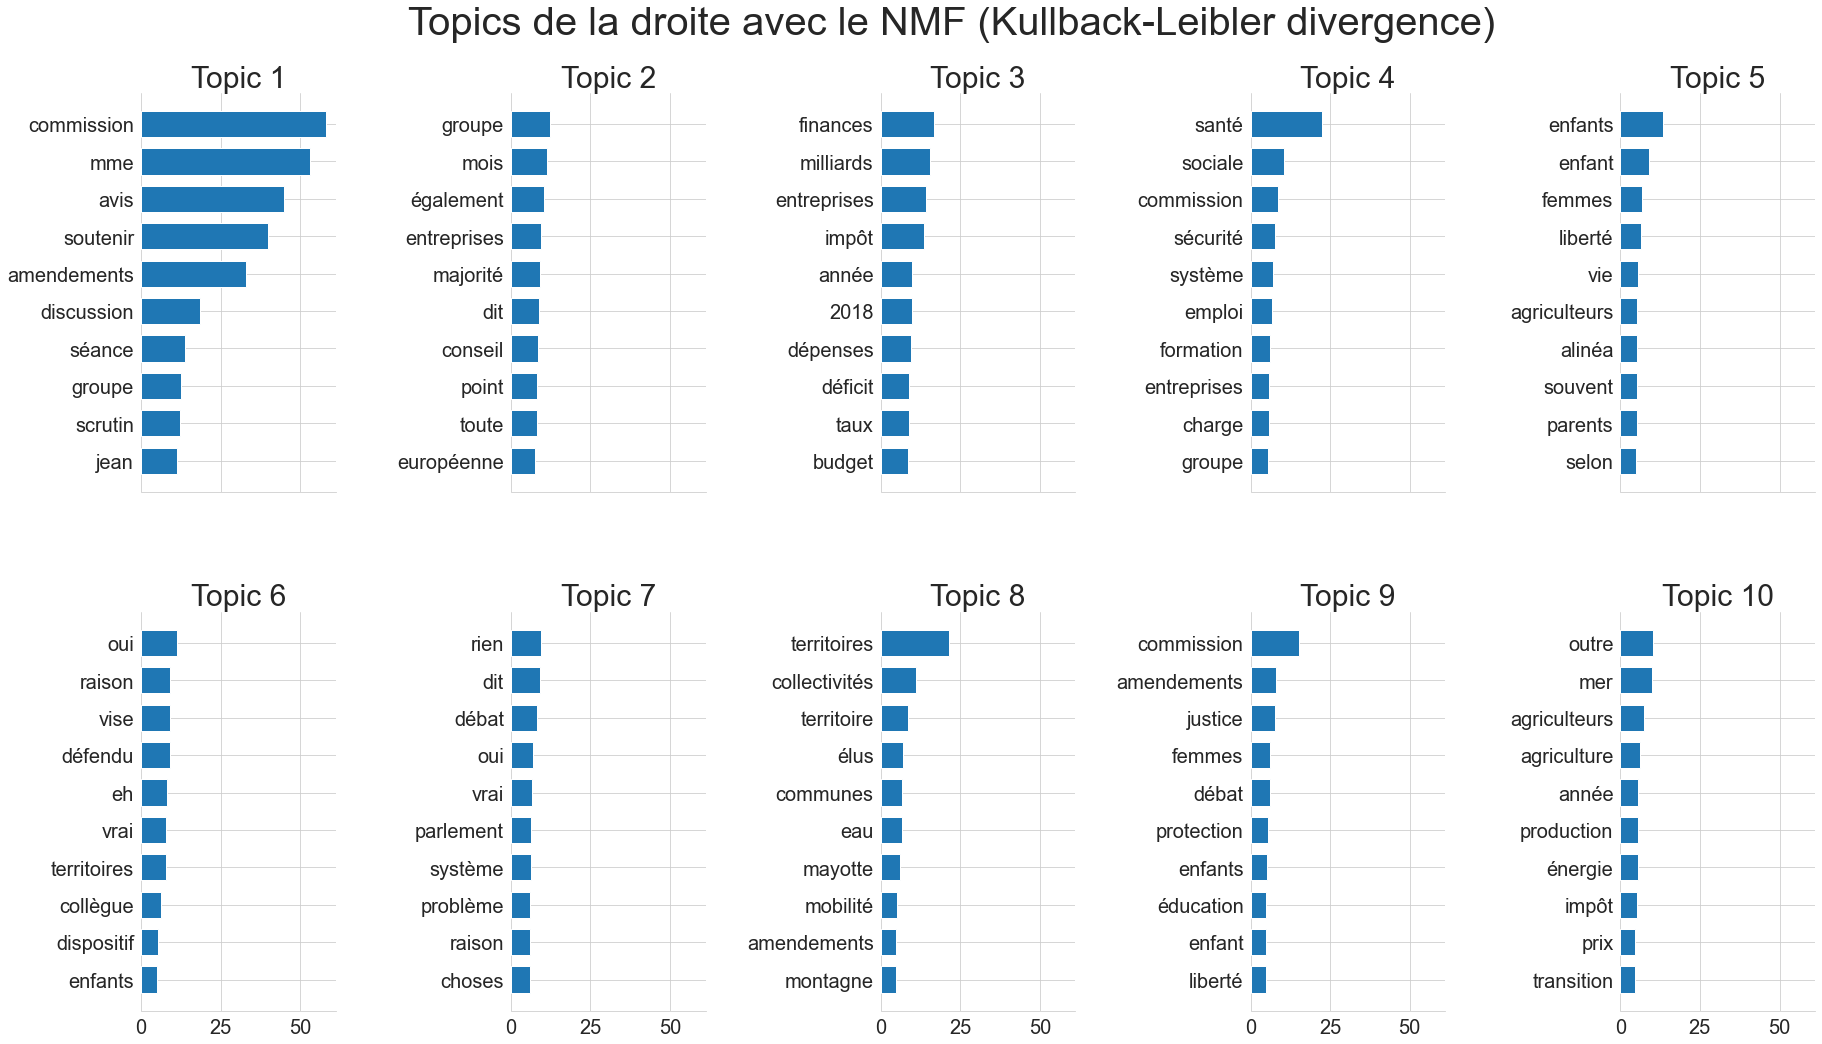

In [57]:
tfidf = tfidf_vectorizer.fit_transform(final['texte'][final.orientation == 'droite'].values)

nmf = NMF(n_components=10, random_state=1,
          beta_loss='kullback-leibler', solver='mu', max_iter=1000, alpha=.1,
          l1_ratio=.5).fit(tfidf)

tfidf_feature_names = tfidf_vectorizer.get_feature_names()
plot_top_words(nmf, tfidf_feature_names, 10,
               "Topics de la droite avec le NMF (Kullback-Leibler divergence)")

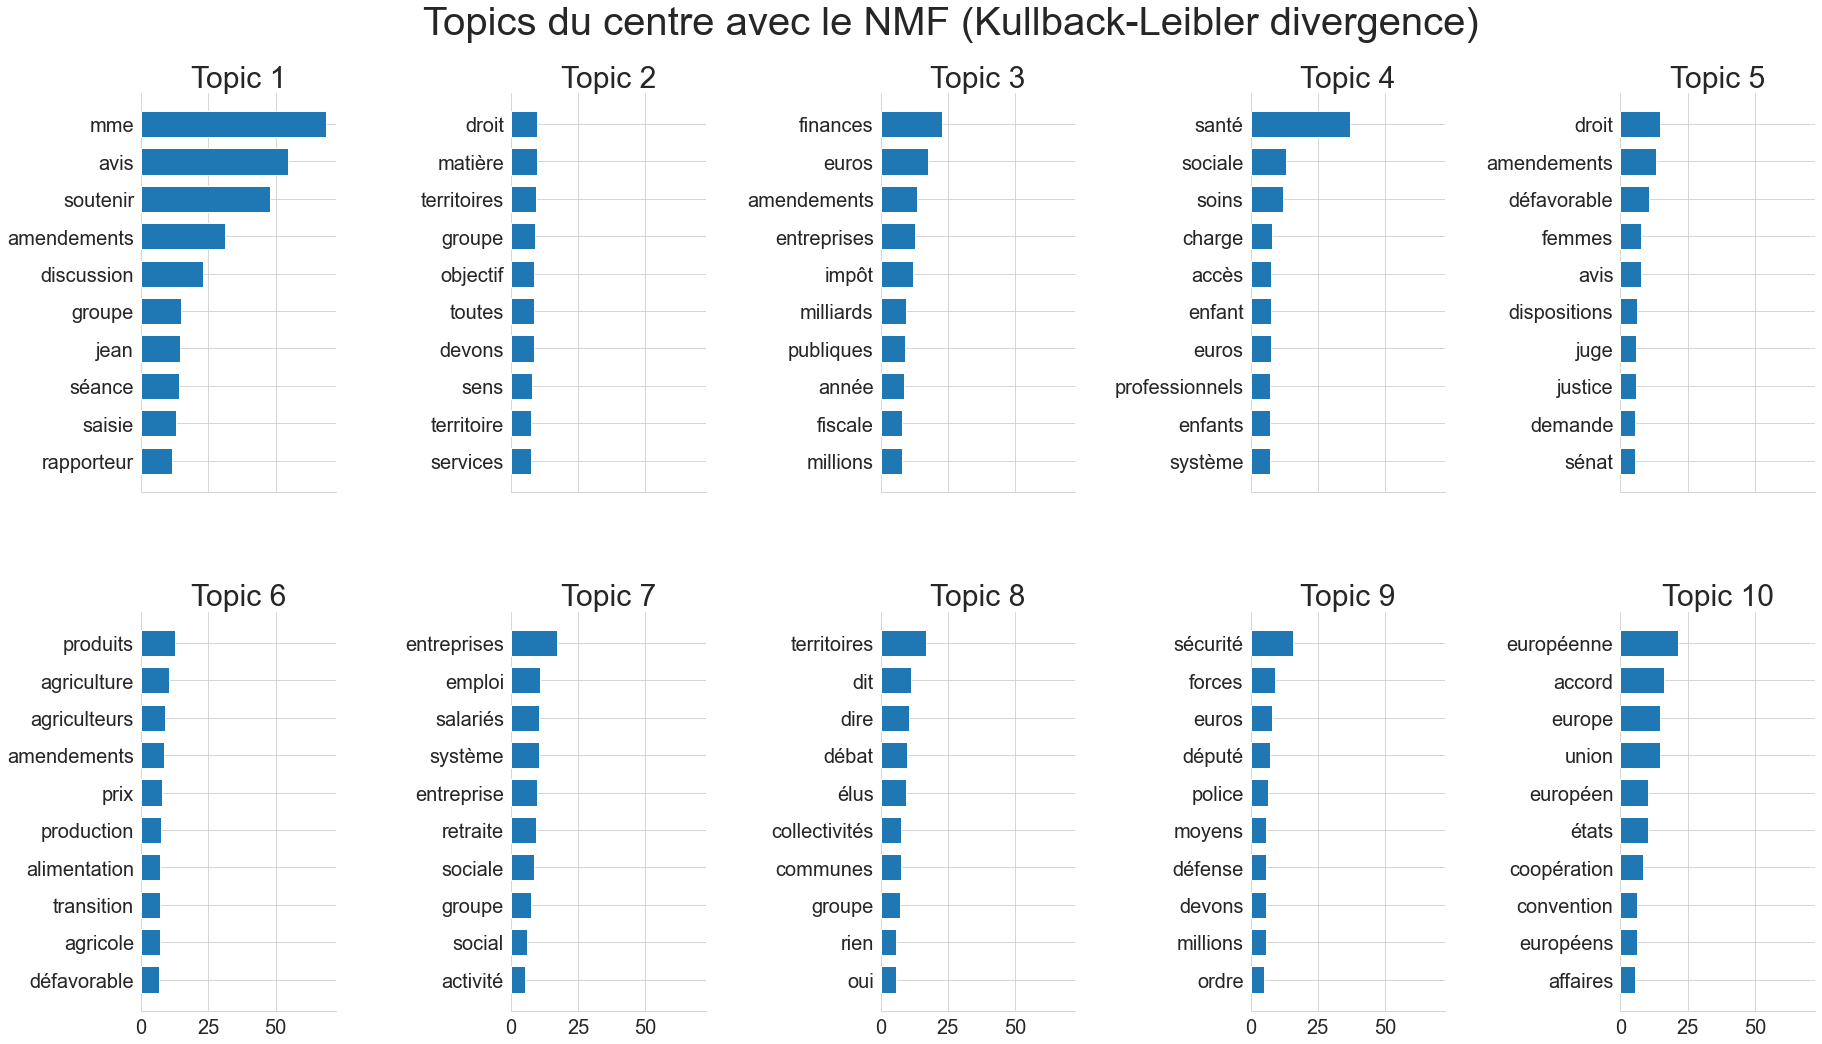

In [59]:
tfidf = tfidf_vectorizer.fit_transform(final['texte'][final.orientation == 'centre'].values)

nmf = NMF(n_components=10, random_state=1,
          beta_loss='kullback-leibler', solver='mu', max_iter=1000, alpha=.1,
          l1_ratio=.5).fit(tfidf)

tfidf_feature_names = tfidf_vectorizer.get_feature_names()
plot_top_words(nmf, tfidf_feature_names, 10,
               "Topics du centre avec le NMF (Kullback-Leibler divergence)")

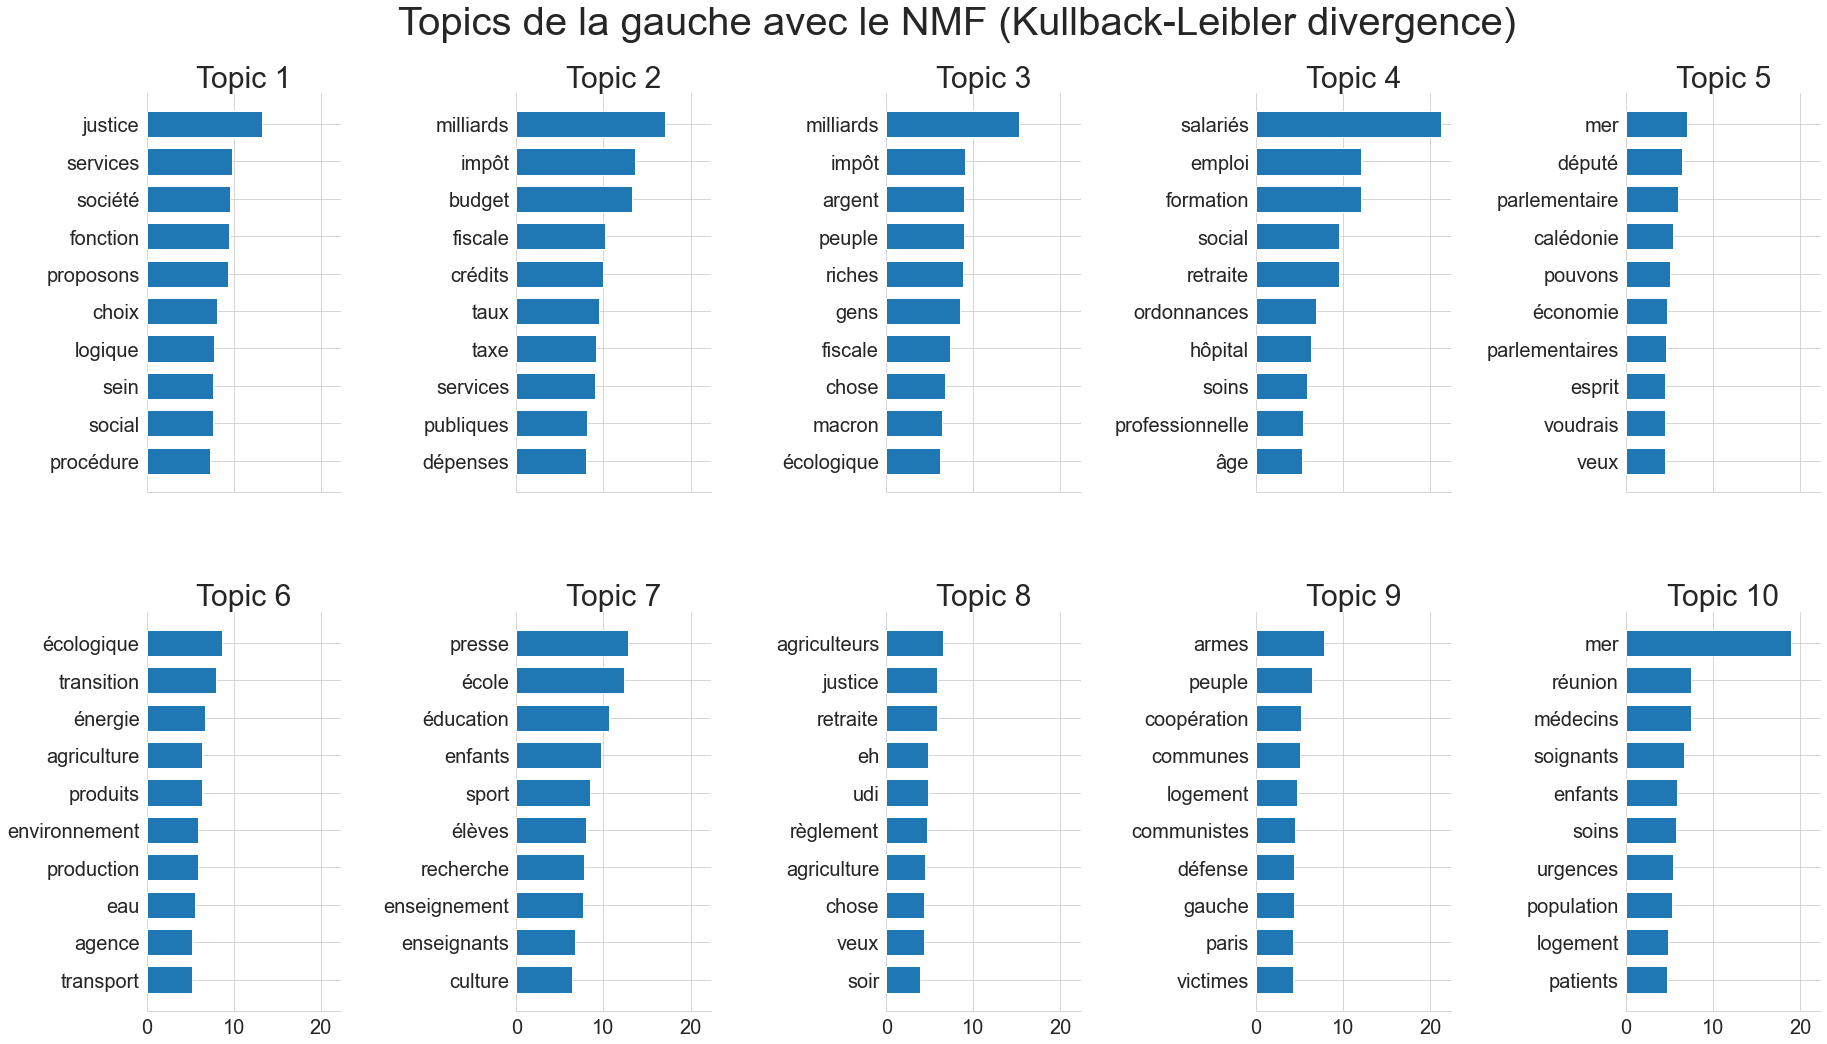

In [58]:
tfidf = tfidf_vectorizer.fit_transform(final['texte'][final.orientation == 'gauche'].values)

nmf = NMF(n_components=10, random_state=1,
          beta_loss='kullback-leibler', solver='mu', max_iter=1000, alpha=.1,
          l1_ratio=.5).fit(tfidf)

tfidf_feature_names = tfidf_vectorizer.get_feature_names()
plot_top_words(nmf, tfidf_feature_names, 10,
               "Topics de la gauche avec le NMF (Kullback-Leibler divergence)")